### Arthor : Ryan Chui, Prasad Chavan, Mayuresh Nene
### Term Project: DSCI 644: Software Engineering for Data Science 

In [1]:
import nltk
nltk.download('stopwords')
import nltk.corpus
import pandas as pd
import string
import re

import multiprocessing
import gensim

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

data_df = pd.read_csv('Duplicate Bug Report/Eclipse/EP_dup.csv')
data_df.head()
print (list(data_df))

data_df['Description1']=data_df['Description1'].fillna('').apply(str)
data_df['Description2']=data_df['Description2'].fillna('').apply(str)
data_df['Title1']=data_df['Title1'].fillna('').apply(str)
data_df['Title2']=data_df['Title2'].fillna('').apply(str)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryanchui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Issue_id', 'Duplicated_issue', 'Title1', 'Description1', 'Title2', 'Description2', 'Label']


In [2]:
nodup_df = pd.read_csv('Duplicate Bug Report/Eclipse/EP_nondup.csv',encoding='cp1252')
nodup_df.head()
print (list(nodup_df))

nodup_df['Description1']=nodup_df['Description1'].fillna('').apply(str)
nodup_df['Description2']=nodup_df['Description2'].fillna('').apply(str)
nodup_df['Title1']=nodup_df['Title1'].fillna('').apply(str)
nodup_df['Title2']=nodup_df['Title2'].fillna('').apply(str)

nodup_df['Description1'].head(10)

['Issue_id', 'Duplicated_issue', 'Title1', 'Description1', 'Title2', 'Description2', 'Label']


0    setup a project that contains a .gif resource ...
1    opening repository resource  open the default ...
2    kmpm \tthis pr about the deletion indicator in...
3    become synchronized with some project in a rep...
4    for gettingsetting the managed state of a reso...
5    iresource.setlocal has problems. this method w...
6    the platform is able to notify people that a r...
7    with the current vcm api a repository adapter ...
8    the implementation has to be changed because a...
9    repository creationdeletion  team stream creat...
Name: Description1, dtype: object

In [3]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
# stop_words = stopwords.words('english')
# print(stop_words)

### Applying cleaning, tokenization, and Lemmatization method

In [4]:
def identify_tokens(row):
    review = row['Description1']
    tokens = nltk.word_tokenize(review)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

data_df['Description1_clean'] = data_df.apply(identify_tokens, axis=1)
nodup_df['Description1_clean'] = nodup_df.apply(identify_tokens, axis=1)

def identify_tokens(row):
    review = row['Description2']
    tokens = nltk.word_tokenize(review)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

data_df['Description2_clean'] = data_df.apply(identify_tokens, axis=1)
nodup_df['Description2_clean'] = nodup_df.apply(identify_tokens, axis=1)

In [5]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['Description1_clean']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

data_df['Description1_clean'] = data_df.apply(remove_stops, axis=1)
nodup_df['Description1_clean'] = nodup_df.apply(remove_stops, axis=1)

def remove_stops(row):
    my_list = row['Description2_clean']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

data_df['Description2_clean'] = data_df.apply(remove_stops, axis=1)
nodup_df['Description2_clean'] = nodup_df.apply(remove_stops, axis=1)

### Instantiate Stemmer to join the words back together

In [6]:
def rejoin_words(row):
    my_list = row['Description1_clean']
    
    # " ".join() to the function to join the lists of words back together.
    joined_words = ( " ".join(my_list))
    
    return joined_words

data_df['Description1_processed'] = data_df.apply(rejoin_words, axis=1)
nodup_df['Description1_processed'] = nodup_df.apply(rejoin_words, axis=1)

def rejoin_words(row):
    my_list = row['Description2_clean']
    
    # " ".join() to the function to join the lists of words back together.
    joined_words = ( " ".join(my_list))
    
    return joined_words

data_df['Description2_processed'] = data_df.apply(rejoin_words, axis=1)
nodup_df['Description2_processed'] = nodup_df.apply(rejoin_words, axis=1)

# data_df.to_csv('EU_DUP_Processed.csv')
# nodup_df.to_csv('EU_Nondup_Processed.csv')

In [7]:
x = data_df.loc[data_df['Label'] == 1, ['Description1_clean', 'Description1_processed', 'Label']]
y = data_df.loc[data_df['Label'] == 1, ['Description2_clean','Description2_processed', 'Label']]

## Relabeling for appending correctly..
x.columns = x.columns.str.replace('Description1_processed', 'Processed')
y.columns = y.columns.str.replace('Description2_processed', 'Processed')

dup_out = x.append(y, ignore_index=True)


m = nodup_df.loc[nodup_df['Label'] == 0, ['Description1_clean', 'Description1_processed', 'Label']]
n = nodup_df.loc[nodup_df['Label'] == 0, ['Description2_clean', 'Description2_processed', 'Label']]

## Relabeling for appending correctly..
m.columns = x.columns.str.replace('Description1_processed', 'Processed')
n.columns = y.columns.str.replace('Description2_processed', 'Processed')

no_dup_out = m.append(n, ignore_index=True)
no_dup_out

final_out = dup_out.append(no_dup_out, ignore_index=True)
# final_out.head(15)
# final_out.to_csv('Final_df.csv')

In [14]:
final_des1 = x.append(m , ignore_index=True)
final_des2 = y.append(n , ignore_index=True)
# final_des1.to_csv('duplicate.csv')

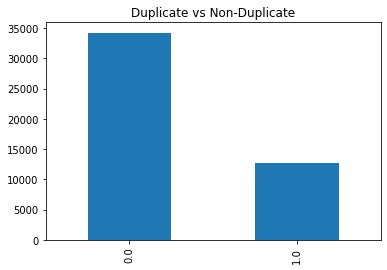

In [15]:
all_data = pd.concat([data_df, nodup_df])
## Simple EDA..
all_data['Label'].value_counts().plot(kind = 'bar', title = 'Duplicate vs Non-Duplicate')

#### Above suggests that there are 12688 comments are classified as duplicates, and 34222 comments are classified as non-duplicates, and this is generally true when our group verified from 'EU_dup' and 'EU_Nondup' files. Class seem to be inbalance between two classes given by the data. Now,  Consider to drop na values and fix null values before taining. Otherwise, this will give an error..

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes 
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

y = final_out['Label'].values

X = final_out['Processed'].values

sentence_train, sentence_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## TF-IDF Vectorizer
count_vec = CountVectorizer(binary = False, stop_words = 'english')
count_vec.fit(sentence_train)

X_train = count_vec.transform(sentence_train)
X_test  = count_vec.transform(sentence_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.83     13768
         1.0       0.46      0.23      0.31      4995

    accuracy                           0.72     18763
   macro avg       0.61      0.57      0.57     18763
weighted avg       0.68      0.72      0.69     18763



/Users/ryanchui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


We achieved 74% accuracy in logistic regression.

In [9]:
final_out['l'] = final_out['Processed'].apply(lambda x: len(str(x).split(' ')))
print("mean length of sentence: " + str(final_out.l.mean()))
print("max length of sentence: " + str(final_out.l.max()))
print("std dev length of sentence: " + str(final_out.l.std()))

mean length of sentence: 44.79221208374195
max length of sentence: 783
std dev length of sentence: 46.91913529974156


In [10]:
print('Number of words in the first sentense: ', final_out.l[0])
print('Display the first sentence: ', final_out['Processed'][0])

Number of words in the first sentense:  34
Display the first sentence:  would helpful notion default repository connection connected project wouldnt walk list everytime sure goes prefs never created maybe create mark one default minimum default repository type cvscc would helpful pulldown repo connection wizard default


In [11]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
import pydotplus
import keras.utils
keras.utils.vis_utils.pydot = pydotplus

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer
 
# calculate the maximum document length
def max_length(lines):
    return max([len(s.split()) for s in lines])
 
# encode a list of lines
def encode_text(tokenizer, lines, length):
    # integer encode
    encoded = tokenizer.texts_to_sequences(lines)
    # pad encoded sequences
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded

def define_model(length, vocab_size):
    inputs = Input(shape=(length,))
    embedding = Embedding(vocab_size, 100)(inputs)
    # channel 1
    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    # channel 2
    conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    # channel 3
    conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    # merge
    merged = concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs], outputs=outputs)
    
    # compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    print(model.summary())
    
    #Save the plot of the defined model
    tf.keras.utils.plot_model(model, show_shapes = True, to_file='Model1.png')
    return model

Using TensorFlow backend.
/Users/ryanchui/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ryanchui/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ryanchui/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ryanchui/opt/anaconda3/lib/p

In [12]:
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Dropout, Input, GlobalMaxPooling1D, Convolution1D, Embedding,SpatialDropout1D
from keras import regularizers
from keras.layers.merge import Concatenate

length = final_out.l.max()

tokenizer = create_tokenizer(final_out['Processed'].values)
vocab_size = len(tokenizer.word_index) + 1

tokenizer = create_tokenizer(final_out['Processed'].values)

length = max_length(final_out['Processed'].values)

# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Max document length: %d' % length)
print('Vocabulary size: %d' % vocab_size) 

y = final_out['Label'].values

X = final_out['Processed'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# # encode data
trainX = encode_text(tokenizer, X_train, length)
testX = encode_text(tokenizer, X_test, length)

## Understand the shape before going into training..
print(trainX.shape, testX.shape)


# define model
model = define_model(length, vocab_size)

# fit model
history = model.fit(trainX, y_train, epochs=3, batch_size=16, validation_data=(testX, y_test))


Max document length: 783
Vocabulary size: 119252
(75049, 783) (18763, 783)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 783)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 783, 100)     11925200    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 780, 32)      12832       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)    

In [13]:
## Evaluate the model
loss, accuracy = model.evaluate(trainX, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(testX, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8849
Testing Accuracy:  0.7084


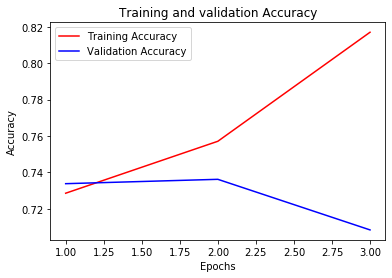

In [14]:
import matplotlib.pyplot as plt

# history = model.fit(trainX, y_train, epochs=3, batch_size=32)

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'r', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

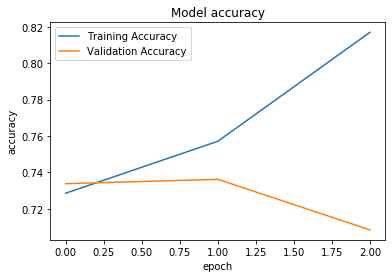

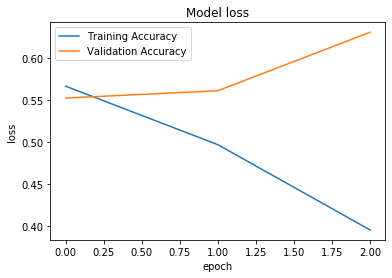

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy','Validation Accuracy'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Accuracy','Validation Accuracy'], loc = 'upper left')
plt.show()

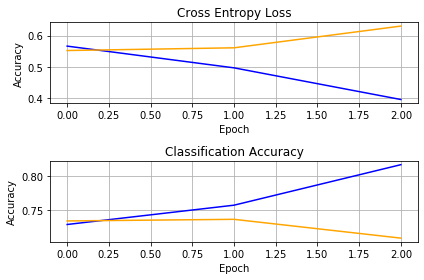

In [18]:
## Same as above for your reference
import sys

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Cross Entropy Loss')
    plt.grid(True)
    
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Classification Accuracy')
    
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.close()
    
summarize_diagnostics(history)

In [19]:
# predict probabilities for test set
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]


In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

y_pred1 = model.predict(testX)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

0.3668922880136439
0.5
0.4232270757123974


/Users/ryanchui/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
## Double Check using classification report

from sklearn.metrics import classification_report

y_pred1 = model.predict(testX)
y_pred_bool = np.argmax(y_pred1, axis=1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.85     13768
         1.0       0.00      0.00      0.00      4995

    accuracy                           0.73     18763
   macro avg       0.37      0.50      0.42     18763
weighted avg       0.54      0.73      0.62     18763



/Users/ryanchui/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#### Done ####
### Try second example of CNN ###
### First CNN model outperform second model in below ###

In [67]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(final_out) * .8)
train_posts = final_out['Processed'][:train_size]
train_tags = final_out['Label'][:train_size]

test_posts = final_out['Processed'][train_size:]
test_tags = final_out['Label'][train_size:]

max_words = 783
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
Testy = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(Testy, num_classes)

# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('Testy shape:', y_test.shape)

batch_size = 32
epochs = 10

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

x_train shape: (75049, 783)
x_test shape: (18763, 783)
y_train shape: (75049, 2)
Testy shape: (18763, 2)
Train on 67544 samples, validate on 7505 samples
Epoch 1/10
67544/67544 [==============================] - 44s 644us/step - loss: 0.6285 - accuracy: 0.6558 - val_loss: 0.4917 - val_accuracy: 0.8520
Epoch 2/10
67544/67544 [==============================] - 51s 761us/step - loss: 0.5897 - accuracy: 0.6881 - val_loss: 0.5781 - val_accuracy: 0.7655
Epoch 3/10
67544/67544 [==============================] - 43s 642us/step - loss: 0.5491 - accuracy: 0.7228 - val_loss: 0.5521 - val_accuracy: 0.7792
Epoch 4/10
67544/67544 [==============================] - 50s 747us/step - loss: 0.5044 - accuracy: 0.7568 - val_loss: 0.5821 - val_accuracy: 0.7624
Epoch 5/10
67544/67544 [==============================] - 46s 687us/step - loss: 0.4643 - accuracy: 0.7827 - val_loss: 0.6258 - val_accuracy: 0.7403
Epoch 6/10
67544/67544 [==============================] - 37s 547us/step - loss: 0.4350 - accuracy: 0

In [68]:
## Evaluate the model
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8865
Testing Accuracy:  0.5763


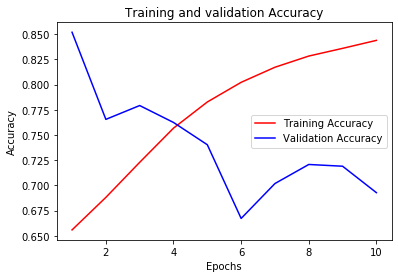

In [69]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'r', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [70]:
## Double Check using classification report

from sklearn.metrics import classification_report

y_pred1 = model.predict(x_test)
y_pred_bool = np.argmax(y_pred1, axis=1)

print(classification_report(Testy, y_pred_bool))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73     18763
           1       0.00      0.00      0.00         0

    accuracy                           0.58     18763
   macro avg       0.50      0.29      0.37     18763
weighted avg       1.00      0.58      0.73     18763



/Users/ryanchui/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


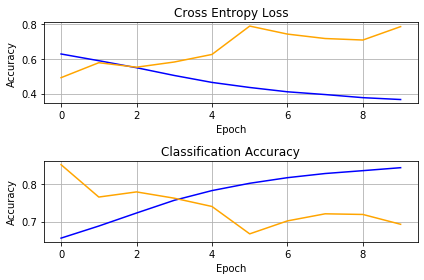

In [71]:
import sys
# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Cross Entropy Loss')
    plt.grid(True)
    
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Classification Accuracy')
    
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.close()
    
summarize_diagnostics(history)